In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('./Daily Diary  - Xinyan.xlsx',sheet_name=None,index_col=1,header=6)
df=pd.DataFrame(columns=['Week',
                         'Date', 
                         'Protocol', 
                         'Happy photo time', 
                         'Unhappy photo time', 
                         'Happy avatar time', 
                         'Unhappy avatar time', 
                         'Initial Emotion rating', 
                         'Final Emotion rating', 
                         'Ease of use', 
                         'Comments'])
i=0
for sheet in data: 
    if sheet =='Week 1':
        for item in data[sheet].values: # 遍历sheet中的数据
            print(i)
            l=item.tolist()
            l.insert(7,np.nan)
            print(l)  # 每一行的数据
            print(len(l))
            df.loc[i,:]=l
            df.loc[i,'Week']=sheet[-1]
            i+=1

for sheet in data:
    print(sheet)  # 每个sheet的名称
    if sheet not in ['INFO','Week 1','Exercises']:
        for item in data[sheet].values: # 遍历sheet中的数据
            print(i)
            print(item.tolist())  # 每一行的数据
            print(len(item.tolist()))
            df.loc[i,:]=item.tolist()
            df.loc[i,'Week']=sheet[-1]
            i+=1


0
[nan, Timestamp('2022-04-26 00:00:00'), 1.0, 10.0, 5.0, 0.0, 0.0, nan, 1.0, 1.0, "Recalling memories that I haven't looked back on for a long time, it took me some effort to remember the details. When I think back to happy times, my thoughts dive into memories, linking to many people and events and forgetting that time passes. When I think back to the unhappy times, I feel a little resistant to thinking about the details. I feel like time is passing slowly and rushing to an end. "]
11
1
[nan, Timestamp('2022-04-26 00:00:00'), 2.0, 0.0, 0.0, 20.0, 5.0, nan, 0.0, 1.0, 'The interaction with the avatar was quite playful overall, and I even forgot about the emotions I had just fallen into. Whether she was in a positive or negative emotional mode, the VR avatar made the whole process very novel. Even if she was a negative emotion, her facial expressions are not stressful, but rather intriguing to me.']
11
2
[nan, Timestamp('2022-04-27 00:00:00'), 1.0, 5.0, 5.0, 0.0, 0.0, nan, 1.0, 1.0, "Re

In [3]:
from datetime import datetime
df['Time']= pd.to_datetime(df['Date'],format='%Y-%M-%D %H:%M:%S')
df['month']=df['Time'].apply(lambda x: x.month)
df['day']=df['Time'].apply(lambda x: x.day)

df['Initial Emotion rating']=df['Initial Emotion rating'].fillna(0)
df=df.dropna(axis=0, how='any')
df

,Week,Date,Protocol,Happy photo time,Unhappy photo time,Happy avatar time,Unhappy avatar time,Initial Emotion rating,Final Emotion rating,Ease of use,Comments,Time,month,day
0,1,2022-04-26 00:00:00,1.0,10.0,5.0,0.0,0.0,0.0,1.0,1.0,Recalling memories that I haven't looked back ...,2022-04-26,4.0,26.0
1,1,2022-04-26 00:00:00,2.0,0.0,0.0,20.0,5.0,0.0,0.0,1.0,The interaction with the avatar was quite play...,2022-04-26,4.0,26.0
2,1,2022-04-27 00:00:00,1.0,5.0,5.0,0.0,0.0,0.0,1.0,1.0,"Repeating yesterday's practice, I was a little...",2022-04-27,4.0,27.0
3,1,2022-04-27 00:00:00,2.0,0.0,0.0,10.0,5.0,0.0,1.0,1.0,"It was still fun to interact with the avatar, ...",2022-04-27,4.0,27.0
4,1,2022-04-28 00:00:00,1.0,10.0,10.0,0.0,0.0,0.0,0.0,1.0,Trying to remember more about what happened in...,2022-04-28,4.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,8,2022-06-15 00:00:00,20.0,8.0,0.0,0.0,0.0,1.0,3.0,2.0,"As I read the affirmations, I felt a sense of ...",2022-06-15,6.0,15.0
104,8,2022-06-16 00:00:00,19.0,0.0,0.0,12.0,0.0,1.0,2.0,2.0,I talked with my avatar about creativity and h...,2022-06-16,6.0,16.0
105,8,2022-06-16 00:00:00,20.0,5.0,0.0,0.0,0.0,2.0,3.0,2.0,Some of the affirmations I may not have unders...,2022-06-16,6.0,16.0
106,8,2022-06-17 00:00:00,19.0,0.0,0.0,6.0,0.0,1.0,4.0,2.0,Not only did I take the challenge of thinking ...,2022-06-17,6.0,17.0


In [4]:
df['month'].value_counts()

5.0    34
6.0    28
4.0    10
Name: month, dtype: int64

In [5]:
# sentiment of comments
# Exercise
# Photo or Avatar

In [6]:
from nltk.tokenize import word_tokenize
#tokenizer = word_tokenizer() 
df["cleaned_comments"]=df["Comments"].apply(lambda x : word_tokenize(x))
df["cleaned_comments"]

0      [Recalling, memories, that, I, have, n't, look...
1      [The, interaction, with, the, avatar, was, qui...
2      [Repeating, yesterday, 's, practice, ,, I, was...
3      [It, was, still, fun, to, interact, with, the,...
4      [Trying, to, remember, more, about, what, happ...
                             ...                        
103    [As, I, read, the, affirmations, ,, I, felt, a...
104    [I, talked, with, my, avatar, about, creativit...
105    [Some, of, the, affirmations, I, may, not, hav...
106    [Not, only, did, I, take, the, challenge, of, ...
107    [I, am, convinced, that, these, inspiring, aff...
Name: cleaned_comments, Length: 72, dtype: object

In [7]:
import re
import string
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text 

def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def clean_text(text):
    '''Make text lowercase, 
    remove text in square brackets,
    remove links,
    remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('\'',' ', text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\b\w{1,2}\b', " ", text)# removes remaining one-letter words and two letters words 
    return text 
df["cleaned_comments"]=df["cleaned_comments"].apply(lambda x : remove_url(str(x)))
df["cleaned_comments"]=df["cleaned_comments"].apply(lambda x : remove_punct(str(x)))
df["cleaned_comments"]=df["cleaned_comments"].apply(lambda x : remove_emoji(str(x)))
df["cleaned_comments"]=df["cleaned_comments"].apply(lambda x : decontraction(str(x)))
df["cleaned_comments"]=df["cleaned_comments"].apply(lambda x : seperate_alphanumeric(str(x)))
df["cleaned_comments"]=df["cleaned_comments"].apply(lambda x : clean_text(str(x)))
df["cleaned_comments"]

0      recalling memories that   have   looked back  ...
1      the interaction with the avatar was quite play...
2      repeating yesterday   practice   was   little ...
3        was still fun   interact with the avatar and...
4      trying   remember more about what happened    ...
                             ...                        
103        read the affirmations   felt   sense   con...
104      talked with   avatar about creativity and ho...
105    some   the affirmations   may not have underst...
106    not only did   take the challenge   thinking o...
107        convinced that these inspiring affirmation...
Name: cleaned_comments, Length: 72, dtype: object

In [8]:
from nltk.corpus import stopwords
stopwords_list= stopwords.words('english')
def remove_stop_words(text, stopwords=set(stopwords.words('english'))):
    """ This function removes stop words from a text
        inputs:
         - stopword list
         - text """

    # prepare new text
    text_splitted = "".join(text).split(" ")
    text_new = list()
    
    # stop words updated
    # stopwords = stopwords.union({"amp", "grocery store", "covid", "supermarket", "people", "grocery", "store", "price", "time"})
    
    # loop
    for word in text_splitted:
        if word not in stopwords:
            text_new.append(word)
    return " ".join(text_new)

def clean_stopwords(df, label):
    """ This function removes stopwords """
    df[label] = df[label].apply(lambda x: remove_stop_words(x))
    return df

df["cleaned_comments"]=df["cleaned_comments"].apply(lambda x: re.sub(r'\b\w{1,2}\b', " ", x))
df["cleaned_comments"]=df["cleaned_comments"].apply(lambda x: re.sub(r"[ \t]{2,}", " ", x))
df["cleaned_comments"]

0      recalling memories that have looked back for l...
1      the interaction with the avatar was quite play...
2      repeating yesterday practice was little distra...
3       was still fun interact with the avatar and to...
4      trying remember more about what happened child...
                             ...                        
103     read the affirmations felt sense conviction h...
104     talked with avatar about creativity and how i...
105    some the affirmations may not have understood ...
106    not only did take the challenge thinking outsi...
107     convinced that these inspiring affirmations g...
Name: cleaned_comments, Length: 72, dtype: object

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #pip install vaderSentiment
def compute_vader_scores(df, label):
    sid = SentimentIntensityAnalyzer()
    df["vader_neg"] = df[label].apply(lambda x: sid.polarity_scores(x)["neg"])
    df["vader_neu"] = df[label].apply(lambda x: sid.polarity_scores(x)["neu"])
    df["vader_pos"] = df[label].apply(lambda x: sid.polarity_scores(x)["pos"])
    df["vader_comp"] = df[label].apply(lambda x: sid.polarity_scores(x)["compound"])
    return df
df = compute_vader_scores(df , "cleaned_comments")
df['comp_score'] = df ['vader_comp'].apply(lambda c: 'pos' if c >0 else('neu' if c==0 else 'neg'))

In [10]:
percent_pos = round(100*df[df['comp_score']=="pos"].shape[0]/df['comp_score'].shape[0], 2)
percent_neu = round(100*df[df['comp_score']=="neu"].shape[0]/df['comp_score'].shape[0], 2)
percent_neg = round(100*df[df['comp_score']=="neg"].shape[0]/df['comp_score'].shape[0], 2)

print(str(percent_pos) + "% of comments have positive sentiment evaluated by VADER")
print(str(percent_neg) + "% of comments have negative sentiment evaluated by VADER")
print(str(percent_neu) + "% of comments have neutral sentiment evaluated by VADER")

79.17% of comments have positive sentiment evaluated by VADER
16.67% of comments have negative sentiment evaluated by VADER
4.17% of comments have neutral sentiment evaluated by VADER


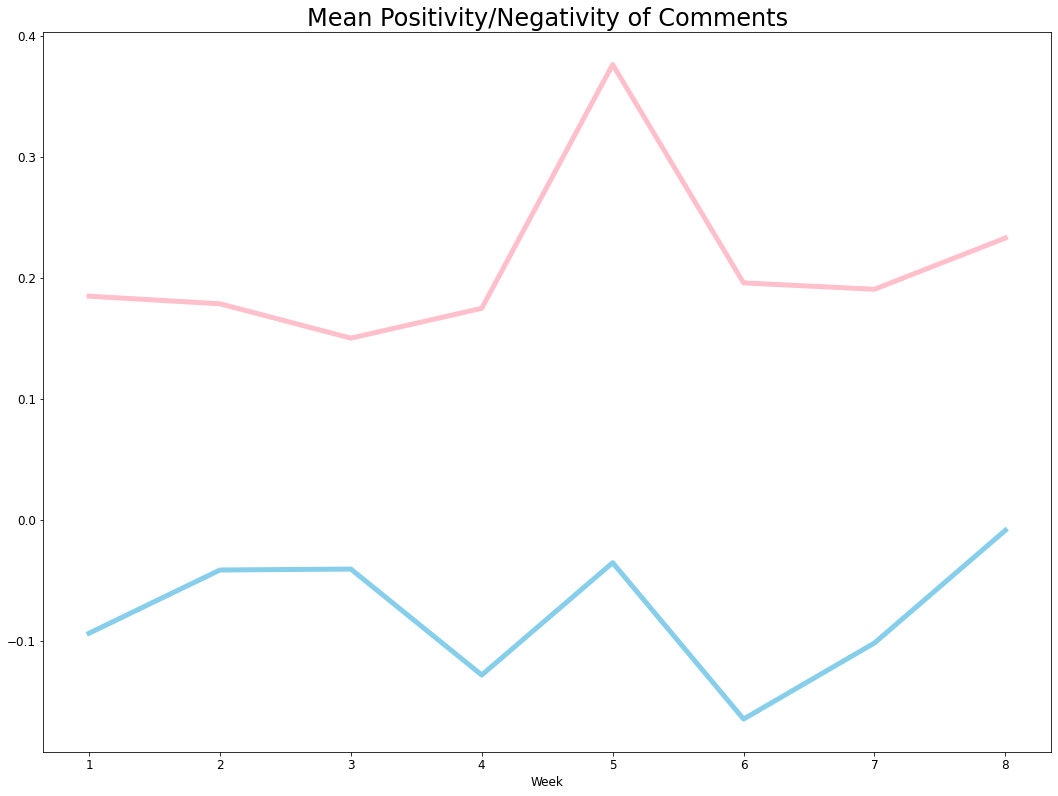

In [11]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Mean Positivity/Negativity of Comments", fontsize=24)
ax.tick_params(labelsize=14)

# Positivity plot
pos = pd.pivot_table(df, values = "vader_pos", index = "Week", aggfunc = "mean")
ax.plot(pos, lw = 5,color = "Pink")

# Negativity plot
neg = pd.pivot_table(df, values = "vader_neg", index = "Week", aggfunc = "mean").apply(lambda x: -x)
ax.plot(neg, lw = 5, color = "Skyblue")
plt.xlabel("Week", fontsize=12)


ax.tick_params(labelsize=12)
plt.show()

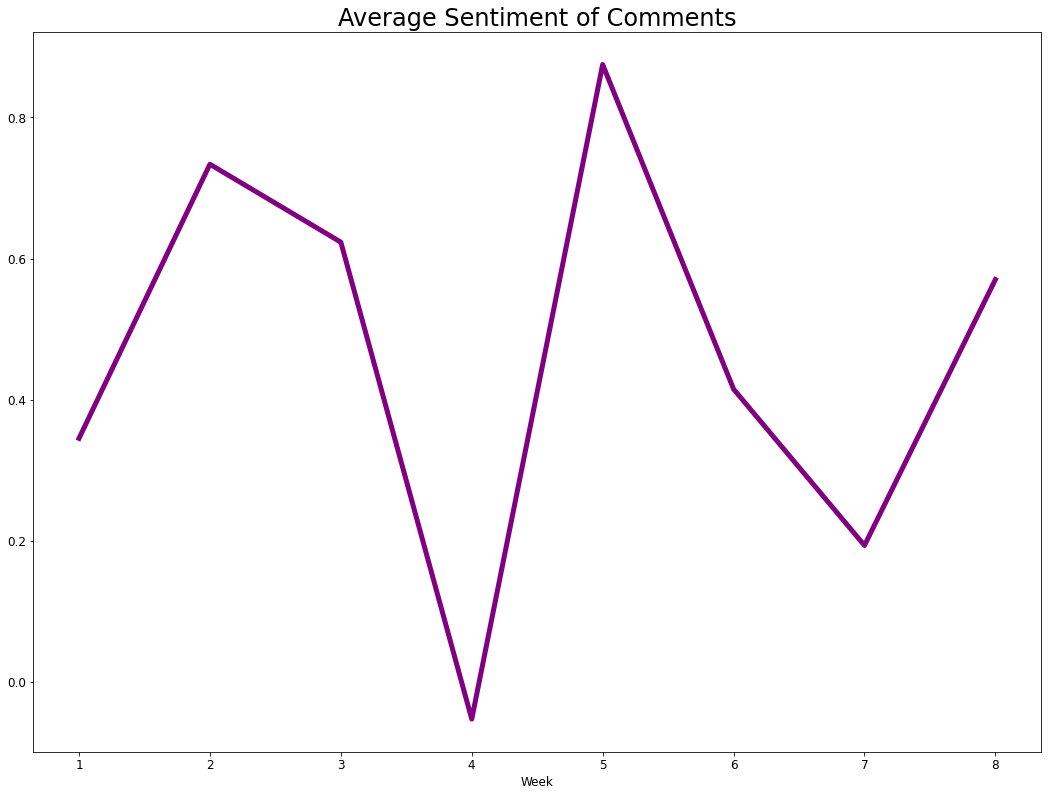

In [12]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Average Sentiment of Comments", fontsize=24)
ax.tick_params(labelsize=14)


year_month = pd.pivot_table(df, values = "vader_comp", index = "Week", aggfunc = "mean")
ax.plot(year_month, lw = 5,color = "Purple")
plt.xlabel("Week", fontsize=12)

ax.tick_params(labelsize=12)
plt.show()

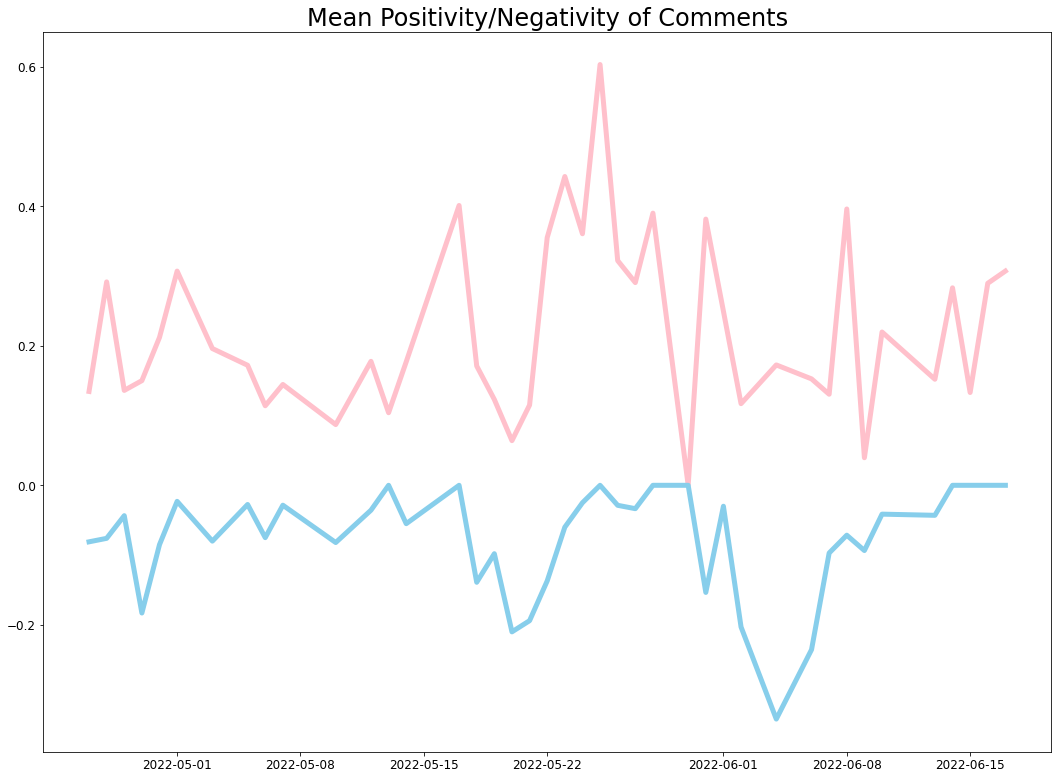

In [13]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Mean Positivity/Negativity of Comments", fontsize=24)
ax.tick_params(labelsize=14)

# Positivity plot
pos = pd.pivot_table(df, values = "vader_pos", index = "Time", aggfunc = "mean")
ax.plot(pos, lw = 5,color = "Pink")

# Negativity plot
neg = pd.pivot_table(df, values = "vader_neg", index = "Time", aggfunc = "mean").apply(lambda x: -x)
ax.plot(neg, lw = 5, color = "Skyblue")


ax.tick_params(labelsize=12)
plt.show()

In [14]:
pos_peak=pd.pivot_table(df, values = "vader_pos", index = "Time", aggfunc = "mean").sort_values('vader_pos',ascending=False).index[0]
df[df['Time']==pos_peak]

,Week,Date,Protocol,Happy photo time,Unhappy photo time,Happy avatar time,Unhappy avatar time,Initial Emotion rating,Final Emotion rating,Ease of use,Comments,Time,month,day,cleaned_comments,vader_neg,vader_neu,vader_pos,vader_comp,comp_score
61,5,2022-05-25 00:00:00,12,12.0,0.0,0.0,0.0,-1.0,2.0,2.0,"A very moving experience, I feel recognized, f...",2022-05-25,5.0,25.0,very moving experience feel recognized fulfil...,0.0,0.397,0.603,0.8442,pos


In [15]:
neg_valley=pd.pivot_table(df, values = "vader_neg", index = "Time", aggfunc = "mean").sort_values('vader_neg',ascending=False).index[0]
df[df['Time']==neg_valley]

,Week,Date,Protocol,Happy photo time,Unhappy photo time,Happy avatar time,Unhappy avatar time,Initial Emotion rating,Final Emotion rating,Ease of use,Comments,Time,month,day,cleaned_comments,vader_neg,vader_neu,vader_pos,vader_comp,comp_score
78,6,2022-06-04 00:00:00,"15,16b",0.0,0.0,5.0,0.0,-2.0,0.0,2.0,I tried to use a happy child and imagine that ...,2022-06-04,6.0,4.0,tried use happy child and imagine that with s...,0.096,0.559,0.345,0.9509,pos
79,6,2022-06-04 00:00:00,"15,16b",0.0,0.0,5.0,0.0,0.0,0.0,2.0,Feelings of conflicting emotions,2022-06-04,6.0,4.0,feelings conflicting emotions,0.574,0.426,0.000,-0.4019,neg


In [16]:
df.sort_values("vader_comp",ascending = True)[:10]

,Week,Date,Protocol,Happy photo time,Unhappy photo time,Happy avatar time,Unhappy avatar time,Initial Emotion rating,Final Emotion rating,Ease of use,Comments,Time,month,day,cleaned_comments,vader_neg,vader_neu,vader_pos,vader_comp,comp_score
84,7,2022-06-06 00:00:00,17.0,0.0,0.0,0.0,7.0,-1.0,-2.0,2.0,I gathered all of the bad sensations that had ...,2022-06-06,6.0,6.0,gathered all the bad sensations that had been...,0.289,0.604,0.107,-0.8442,neg
45,4,2022-05-20 00:00:00,9.0,10.0,0.0,0.0,3.0,0.0,2.0,2.0,"I'm being more cautious, opting for the milder...",2022-05-20,5.0,20.0,being more cautious opting for the milder tra...,0.210,0.726,0.064,-0.8434,neg
28,3,2022-05-10 00:00:00,6,0.0,0.0,5.0,0.0,-3.0,-3.0,2.0,Today was a postponed exercise and it became a...,2022-05-10,5.0,10.0,today was postponed exercise and became appare...,0.082,0.831,0.087,-0.6647,neg
6,1,2022-04-29 00:00:00,1.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,A very bad day personally. It's hard to focus ...,2022-04-29,4.0,29.0,very bad day personally hard focus when looki...,0.302,0.698,0.000,-0.6361,neg
86,7,2022-06-07 00:00:00,17.0,0.0,0.0,0.0,10.0,-2.0,-2.0,2.0,"When I looked back at my negativity, I saw tha...",2022-06-07,6.0,7.0,when looked back negativity saw that seldom to...,0.133,0.820,0.047,-0.5994,neg
90,7,2022-06-09 00:00:00,17.0,0.0,0.0,0.0,5.0,-3.0,-3.0,2.0,"So far today, I've been much more conscious of...",2022-06-09,6.0,9.0,far today been much more conscious negativeve...,0.141,0.859,0.000,-0.4215,neg
79,6,2022-06-04 00:00:00,"15,16b",0.0,0.0,5.0,0.0,0.0,0.0,2.0,Feelings of conflicting emotions,2022-06-04,6.0,4.0,feelings conflicting emotions,0.574,0.426,0.000,-0.4019,neg
75,6,2022-06-02 00:00:00,"15,16b",0.0,10.0,0.0,0.0,0.0,-1.0,2.0,"Feelings of mixed, somewhat conflicting emotions",2022-06-02,6.0,2.0,feelings mixed somewhat conflicting emotions,0.376,0.624,0.000,-0.3415,neg
43,4,2022-05-18 00:00:00,9.0,5.0,0.0,0.0,5.0,-1.0,0.0,2.0,Started when I was a little more calm and rati...,2022-05-18,5.0,18.0,started when was little more calm and rational...,0.139,0.690,0.171,-0.2579,neg
46,4,2022-05-21 00:00:00,10.0,3.0,0.0,0.0,0.0,0.0,-1.0,2.0,I'm not ready yet; exercise 10 gives me a lot ...,2022-05-21,5.0,21.0,not ready yet exercise gives lot resistance a...,0.194,0.691,0.115,-0.1803,neg


In [17]:
df.sort_values("vader_comp",ascending = False)[:10]

,Week,Date,Protocol,Happy photo time,Unhappy photo time,Happy avatar time,Unhappy avatar time,Initial Emotion rating,Final Emotion rating,Ease of use,Comments,Time,month,day,cleaned_comments,vader_neg,vader_neu,vader_pos,vader_comp,comp_score
14,2,2022-05-01 00:00:00,"3,4",0.0,0.0,20.0,0.0,2.0,4.0,2.0,Adding the singing practice really makes the e...,2022-05-01,5.0,1.0,adding the singing practice really makes the e...,0.023,0.670,0.307,0.9898,pos
94,7,2022-06-10 00:00:00,18.0,20.0,0.0,0.0,0.0,-2.0,3.0,2.0,"So far, talking to friends, active listening, ...",2022-06-10,6.0,10.0,far talking friends active listening and supp...,0.000,0.483,0.517,0.9771,pos
29,3,2022-05-12 00:00:00,8,5.0,5.0,0.0,0.0,-3.0,-1.0,2.0,With regards to making a connection with the n...,2022-05-12,5.0,12.0,with regards making connection with the natura...,0.000,0.754,0.246,0.9726,pos
33,3,2022-05-14 00:00:00,"6,7",0.0,0.0,0.0,15.0,-1.0,2.0,2.0,For the imagination of building out my inner h...,2022-05-14,5.0,14.0,for the imagination building out inner house l...,0.055,0.767,0.177,0.9724,pos
20,2,2022-05-07 00:00:00,"3, 4",0.0,0.0,10.0,0.0,-2.0,1.0,2.0,Extra practice with music today. I was plannin...,2022-05-07,5.0,7.0,extra practice with music today was planning a...,0.057,0.780,0.162,0.9694,pos
15,2,2022-05-03 00:00:00,3,0.0,0.0,10.0,0.0,-3.0,-1.0,2.0,These practices are becoming a daily ritual fo...,2022-05-03,5.0,3.0,these practices are becoming daily ritual for ...,0.080,0.724,0.196,0.9681,pos
64,5,2022-05-26 00:00:00,"3,12",20.0,0.0,0.0,0.0,1.0,4.0,2.0,"It has brought back plenty of happy memories, ...",2022-05-26,5.0,26.0,has brought back plenty happy memories belief...,0.000,0.646,0.354,0.9595,pos
63,5,2022-05-26 00:00:00,"13,14",0.0,0.0,5.0,0.0,0.0,2.0,2.0,Looking at a happy child in the VR environment...,2022-05-26,5.0,26.0,looking happy child the environment perhaps be...,0.000,0.664,0.336,0.9595,pos
73,6,2022-06-01 00:00:00,"15,16a",0.0,0.0,0.0,5.0,-1.0,0.0,2.0,"Compared to the previous days, this time it st...",2022-06-01,6.0,1.0,compared the previous days this time started e...,0.060,0.708,0.232,0.9575,pos
57,5,2022-05-23 00:00:00,12,5.0,0.0,0.0,0.0,0.0,2.0,2.0,Combining a sense of achievement with the rele...,2022-05-23,5.0,23.0,combining sense achievement with the release l...,0.000,0.495,0.505,0.9542,pos


In [19]:
df['Emotion change']=(((df['Final Emotion rating']+5)/10)-((df['Initial Emotion rating']+5)/10))/((df['Initial Emotion rating']+5)/10)
df['Emotion change']


0           0.2
1           0.0
2           0.2
3           0.2
4           0.0
         ...   
103    0.333333
104    0.166667
105    0.142857
106         0.5
107    0.142857
Name: Emotion change, Length: 72, dtype: object

In [147]:
df[df['Emotion change']==df['Emotion change'].max()]

,Week,Date,Protocol,Happy photo time,Unhappy photo time,Happy avatar time,Unhappy avatar time,Initial Emotion rating,Final Emotion rating,Ease of use,...,Time,month,day,cleaned_comments,vader_neg,vader_neu,vader_pos,vader_comp,comp_score,Emotion change
91,7,2022-06-09 00:00:00,18.0,0.0,0.0,0.0,8.0,-3.0,1.0,2.0,...,2022-06-09,6.0,9.0,gazed the unhappy child for long periods time...,0.046,0.875,0.079,0.3291,pos,2.0


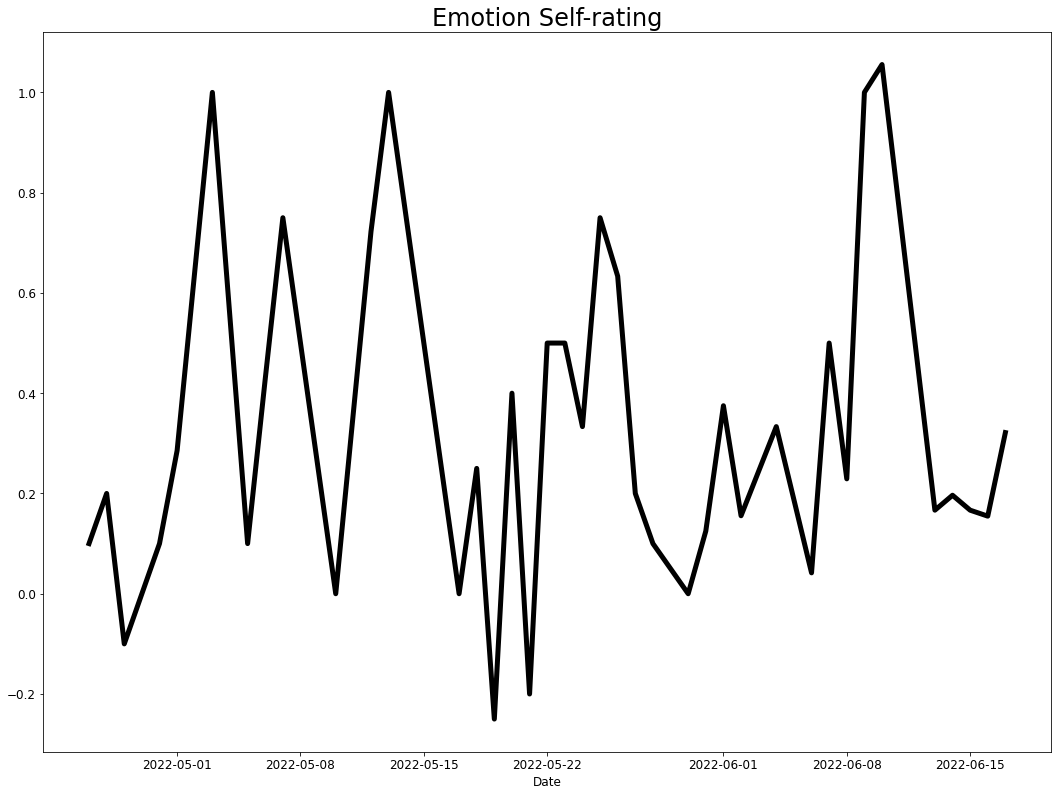

In [148]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Emotion Self-rating", fontsize=24)
ax.tick_params(labelsize=14)

# Emotion self-rating plot
emo = pd.pivot_table(df, values = "Emotion change", index = "Time", aggfunc = "mean")
ax.plot(emo, lw = 5,color = "Black")
plt.xlabel("Date", fontsize=12)

ax.tick_params(labelsize=12)
plt.show()

In [22]:
temp=df.copy()
temp["Emotion change"]=abs(df["Emotion change"])
temp.sort_values("Emotion change",ascending = False)[:10]

,Week,Date,Protocol,Happy photo time,Unhappy photo time,Happy avatar time,Unhappy avatar time,Initial Emotion rating,Final Emotion rating,Ease of use,...,Time,month,day,cleaned_comments,vader_neg,vader_neu,vader_pos,vader_comp,comp_score,Emotion change
91,7,2022-06-09 00:00:00,18.0,0.0,0.0,0.0,8.0,-3.0,1.0,2.0,...,2022-06-09,6.0,9.0,gazed the unhappy child for long periods time...,0.046,0.875,0.079,0.3291,pos,2.0
94,7,2022-06-10 00:00:00,18.0,20.0,0.0,0.0,0.0,-2.0,3.0,2.0,...,2022-06-10,6.0,10.0,far talking friends active listening and supp...,0.000,0.483,0.517,0.9771,pos,1.666667
87,7,2022-06-07 00:00:00,18.0,20.0,0.0,0.0,0.0,-2.0,1.0,2.0,...,2022-06-07,6.0,7.0,going walk was able shift emotions toward cal...,0.061,0.725,0.214,0.6124,pos,1.0
29,3,2022-05-12 00:00:00,8,5.0,5.0,0.0,0.0,-3.0,-1.0,2.0,...,2022-05-12,5.0,12.0,with regards making connection with the natura...,0.000,0.754,0.246,0.9726,pos,1.0
62,5,2022-05-26 00:00:00,12,5.0,0.0,0.0,0.0,-3.0,-1.0,2.0,...,2022-05-26,5.0,26.0,even though was the best moods the time attemp...,0.086,0.638,0.276,0.8810,pos,1.0
20,2,2022-05-07 00:00:00,"3, 4",0.0,0.0,10.0,0.0,-2.0,1.0,2.0,...,2022-05-07,5.0,7.0,extra practice with music today was planning a...,0.057,0.780,0.162,0.9694,pos,1.0
92,7,2022-06-10 00:00:00,17.0,0.0,0.0,0.0,5.0,-4.0,-3.0,2.0,...,2022-06-10,6.0,10.0,throughout the day became conscious bitterness...,0.124,0.734,0.142,0.1027,pos,1.0
32,3,2022-05-13 00:00:00,8,20.0,0.0,0.0,0.0,-2.0,1.0,2.0,...,2022-05-13,5.0,13.0,the way home late the evening once again made...,0.000,0.896,0.104,0.8860,pos,1.0
15,2,2022-05-03 00:00:00,3,0.0,0.0,10.0,0.0,-3.0,-1.0,2.0,...,2022-05-03,5.0,3.0,these practices are becoming daily ritual for ...,0.080,0.724,0.196,0.9681,pos,1.0
33,3,2022-05-14 00:00:00,"6,7",0.0,0.0,0.0,15.0,-1.0,2.0,2.0,...,2022-05-14,5.0,14.0,for the imagination building out inner house l...,0.055,0.767,0.177,0.9724,pos,0.75


In [23]:
negative_diary_text = " ".join([text for text in df[df["comp_score"]=="neg"]["cleaned_comments"]]).split(' ')
positive_diary_text = " ".join([text for text in df[df["comp_score"]=="pos"]["cleaned_comments"]]).split(' ')

positive_word=set([i for i in positive_diary_text if i not in negative_diary_text])
neutral_word=set([i for i in negative_diary_text if i in positive_diary_text])
negative_word=set([i for i in negative_diary_text if i not in positive_diary_text])
print("--------------------------------")
print("Number of words in positive tweets:",'\n',len(positive_diary_text))
print("Number of positive words:",'\n',len(positive_word))
print("--------------------------------")
print("Number of neutral words:",'\n',len(neutral_word))
print("--------------------------------")
print("Number of words in negative tweets:",'\n',len(negative_diary_text))
print("Number of negative words:",'\n',len(negative_word))
print("--------------------------------")


--------------------------------
Number of words in positive tweets: 
 2621
Number of positive words: 
 717
--------------------------------
Number of neutral words: 
 178
--------------------------------
Number of words in negative tweets: 
 586
Number of negative words: 
 139
--------------------------------


In [24]:
mapped_negative_text=[text for text in negative_diary_text if text in negative_word]
mapped_positive_text=[text for text in positive_diary_text if text in positive_word]
print("Number of mapped negative text:",len(mapped_negative_text))
print("Number of mapped positive text:",len(mapped_positive_text))

Number of mapped negative text: 158
Number of mapped positive text: 1188


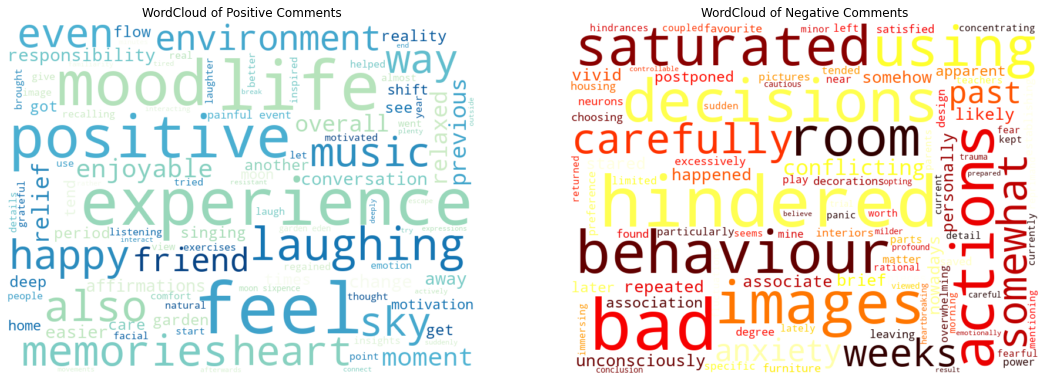

In [25]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stopwords= stopwords.words('english')

cloud_negative_tweets = " ".join(mapped_negative_text)
wordcloud_negative = WordCloud(width=800, height=600, max_font_size=120,max_words=100, background_color="white", colormap="hot",stopwords = stopwords).generate(cloud_negative_tweets)

cloud_positive_tweets = " ".join(mapped_positive_text)
wordcloud_positive = WordCloud(width=800, height=600, max_font_size=120,max_words=100, background_color="white", colormap="GnBu",stopwords = stopwords).generate(cloud_positive_tweets)

parameters = {'axes.labelsize': 12,
              'axes.titlesize': 10}

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18.5, 7)
ax1.imshow(wordcloud_positive, interpolation='bilinear')
ax1.axis("off")
ax1.set_title("WordCloud of Positive Comments", fontsize=12)
ax2.imshow(wordcloud_negative, interpolation='bilinear')
ax2.axis("off")
ax2.set_title("WordCloud of Negative Comments", fontsize=12)
plt.rcParams.update(parameters)
plt.show()

In [26]:
from collections import Counter
def top20(textlist):
    # First make a string out of the entire list
    BIGstr = " ".join(textlist)
    wordlist = BIGstr.split(" ")
    wordlist=[i for i in wordlist if i not in stopwords]
    wordcount = Counter(wordlist) 
    del wordcount['']
    return(wordcount.most_common(20))

print(top20(mapped_negative_text))
temp = pd.DataFrame(top20(mapped_negative_text))
temp.columns = ['word_in_negative_diary','Count']
temp.style.background_gradient(cmap='OrRd')



[('bad', 3), ('hindered', 3), ('decisions', 2), ('actions', 2), ('images', 2), ('using', 2), ('saturated', 2), ('carefully', 2), ('somewhat', 2), ('weeks', 2), ('anxiety', 2), ('past', 2), ('conflicting', 2), ('happened', 1), ('behaviours', 1), ('nowadays', 1), ('repeated', 1), ('behaviour', 1), ('somehow', 1), ('unconsciously', 1)]


,word_in_negative_diary,Count
0,bad,3
1,hindered,3
2,decisions,2
3,actions,2
4,images,2
5,using,2
6,saturated,2
7,carefully,2
8,somewhat,2
9,weeks,2


In [27]:
print(top20(mapped_positive_text))
temp2 = pd.DataFrame(top20(mapped_positive_text))
temp2.columns = ['word_in_positive_diary','Count']
temp2.style.background_gradient(cmap='GnBu')

[('feel', 14), ('life', 13), ('experience', 12), ('positive', 10), ('mood', 10), ('laughing', 10), ('memories', 9), ('also', 9), ('happy', 8), ('even', 8), ('music', 8), ('sky', 8), ('heart', 8), ('environment', 7), ('garden', 7), ('way', 7), ('moon', 7), ('enjoyable', 6), ('painful', 6), ('overall', 5)]


,word_in_positive_diary,Count
0,feel,14
1,life,13
2,experience,12
3,positive,10
4,mood,10
5,laughing,10
6,memories,9
7,also,9
8,happy,8
9,even,8


In [28]:
# Total practice time with Happy photo
print("Total practice time with Happy photo in minute: ",sum(df['Happy photo time']))

# Total practice time with Unhappy photo
print("Total practice time with Unhappy photo in minute: ",sum(df['Unhappy photo time']))

# Total practice time with Happy avatar
print("Total practice time with Happy avatar in minute: ",sum(df['Happy avatar time']))

# Total practice time with Unhappy avatar
print("Total practice time with Unhappy avatar in minute: ",sum(df['Unhappy avatar time']))

Total practice time with Happy photo in minute:  308.0
Total practice time with Unhappy photo in minute:  72.0
Total practice time with Happy avatar in minute:  179.0
Total practice time with Unhappy avatar in minute:  147.0


In [29]:
df

,Week,Date,Protocol,Happy photo time,Unhappy photo time,Happy avatar time,Unhappy avatar time,Initial Emotion rating,Final Emotion rating,Ease of use,...,Time,month,day,cleaned_comments,vader_neg,vader_neu,vader_pos,vader_comp,comp_score,Emotion change
0,1,2022-04-26 00:00:00,1.0,10.0,5.0,0.0,0.0,0.0,1.0,1.0,...,2022-04-26,4.0,26.0,recalling memories that have looked back for l...,0.046,0.852,0.102,0.5267,pos,0.2
1,1,2022-04-26 00:00:00,2.0,0.0,0.0,20.0,5.0,0.0,0.0,1.0,...,2022-04-26,4.0,26.0,the interaction with the avatar was quite play...,0.116,0.717,0.167,0.2249,pos,0.0
2,1,2022-04-27 00:00:00,1.0,5.0,5.0,0.0,0.0,0.0,1.0,1.0,...,2022-04-27,4.0,27.0,repeating yesterday practice was little distra...,0.152,0.650,0.198,0.3597,pos,0.2
3,1,2022-04-27 00:00:00,2.0,0.0,0.0,10.0,5.0,0.0,1.0,1.0,...,2022-04-27,4.0,27.0,was still fun interact with the avatar and to...,0.000,0.615,0.385,0.8977,pos,0.2
4,1,2022-04-28 00:00:00,1.0,10.0,10.0,0.0,0.0,0.0,0.0,1.0,...,2022-04-28,4.0,28.0,trying remember more about what happened child...,0.087,0.842,0.072,-0.1531,neg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,8,2022-06-15 00:00:00,20.0,8.0,0.0,0.0,0.0,1.0,3.0,2.0,...,2022-06-15,6.0,15.0,read the affirmations felt sense conviction h...,0.000,1.000,0.000,0.0000,neu,0.333333
104,8,2022-06-16 00:00:00,19.0,0.0,0.0,12.0,0.0,1.0,2.0,2.0,...,2022-06-16,6.0,16.0,talked with avatar about creativity and how i...,0.000,0.710,0.290,0.8313,pos,0.166667
105,8,2022-06-16 00:00:00,20.0,5.0,0.0,0.0,0.0,2.0,3.0,2.0,...,2022-06-16,6.0,16.0,some the affirmations may not have understood ...,0.000,0.711,0.289,0.6897,pos,0.142857
106,8,2022-06-17 00:00:00,19.0,0.0,0.0,6.0,0.0,1.0,4.0,2.0,...,2022-06-17,6.0,17.0,not only did take the challenge thinking outsi...,0.000,0.954,0.046,0.0387,pos,0.5


In [119]:
data=df[['Week',
     'month', 
     'day',
     'Protocol', 
     'Happy photo time', 
     'Unhappy photo time', 
     'Happy avatar time', 
     'Unhappy avatar time', 
     'Initial Emotion rating', 
     'Final Emotion rating', 
     'Ease of use',
     'Emotion change',
     'comp_score']]

In [120]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
category=[]
numeric_disc=[]
numeric_cont=[]
 


for i in  data.columns :
    if (len(data[i].value_counts())<=3 and i not in ["comp_score"]):
            numeric_disc.append(i)
            data[i]=data[i].fillna(data[i].mode()[0])
            print("discrete",i)
            continue
    if i not in (numeric_cont+numeric_disc+['Week','month','day',"Protocol","comp_score"]):     
        numeric_cont.append(i)
        scaler = MinMaxScaler()
        scaler=scaler.fit(np.array(data[i]).reshape(-1, 1))
        data[i]= data[i].fillna(data[i].mean())
        data[i] = scaler.transform(np.array(data[i]).reshape(-1, 1))
        print('continueous',i)
        
    if i in ['Week','month','day'] or (data[i].dtype == "object"):
        category.append(i)
        data[i]=data[i].astype('category')
        print('category',i)

/var/folders/0s/r_ncjf_j67z8qchrjzz_8j640000gn/T/ipykernel_9410/396025078.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=data[i].astype('category')
/var/folders/0s/r_ncjf_j67z8qchrjzz_8j640000gn/T/ipykernel_9410/396025078.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=data[i].fillna(data[i].mode()[0])
/var/folders/0s/r_ncjf_j67z8qchrjzz_8j640000gn/T/ipykernel_9410/396025078.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

category Week
discrete month
category day
category Protocol
continueous Happy photo time
continueous Unhappy photo time
continueous Happy avatar time
continueous Unhappy avatar time
continueous Initial Emotion rating
continueous Final Emotion rating
discrete Ease of use
continueous Emotion change
category comp_score


/var/folders/0s/r_ncjf_j67z8qchrjzz_8j640000gn/T/ipykernel_9410/396025078.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = scaler.transform(np.array(data[i]).reshape(-1, 1))
/var/folders/0s/r_ncjf_j67z8qchrjzz_8j640000gn/T/ipykernel_9410/396025078.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=data[i].astype('category')


In [121]:
X=data[data.columns[:-1]]
y=data[data.columns[-1]]

In [122]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 107
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Week                    72 non-null     category
 1   month                   72 non-null     float64 
 2   day                     72 non-null     category
 3   Protocol                72 non-null     category
 4   Happy photo time        72 non-null     float64 
 5   Unhappy photo time      72 non-null     float64 
 6   Happy avatar time       72 non-null     float64 
 7   Unhappy avatar time     72 non-null     float64 
 8   Initial Emotion rating  72 non-null     float64 
 9   Final Emotion rating    72 non-null     float64 
 10  Ease of use             72 non-null     float64 
 11  Emotion change          72 non-null     float64 
dtypes: category(3), float64(9)
memory usage: 8.2 KB


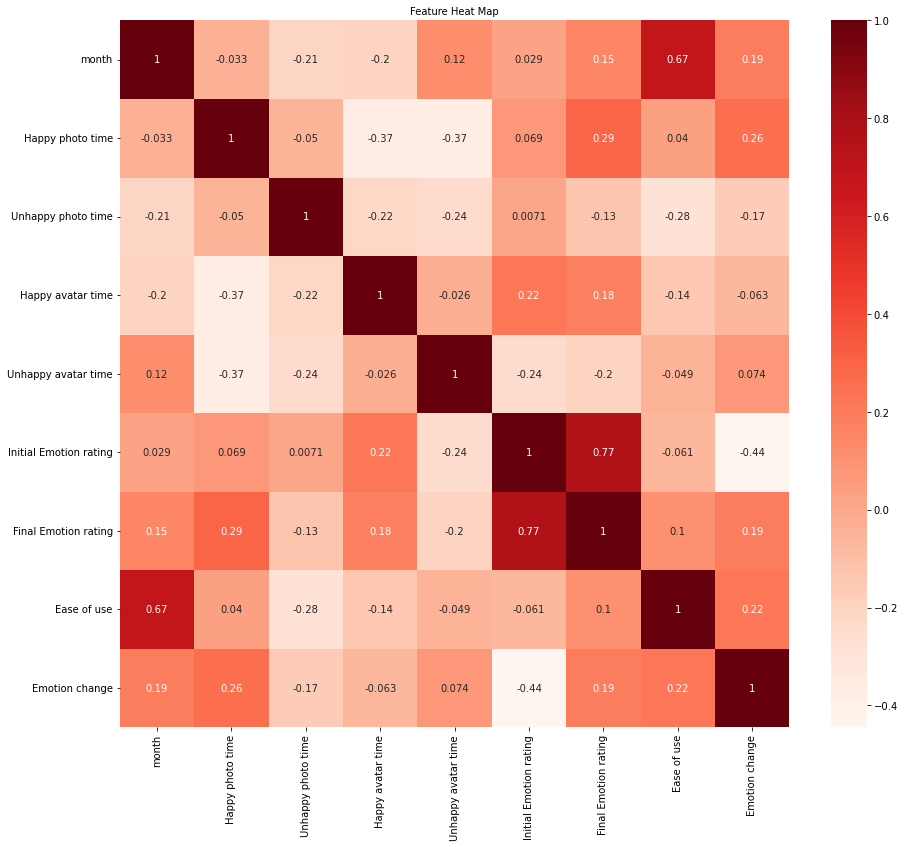

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,13))
cor = X.corr()

sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title("Feature Heat Map")
plt.show()

In [124]:
data[data['Happy photo time']!=0]

,Week,month,day,Protocol,Happy photo time,Unhappy photo time,Happy avatar time,Unhappy avatar time,Initial Emotion rating,Final Emotion rating,Ease of use,Emotion change,comp_score
0,1,4.0,26.0,1.0,0.454545,0.5,0.0,0.000000,0.571429,0.500,1.0,0.200000,pos
2,1,4.0,27.0,1.0,0.227273,0.5,0.0,0.000000,0.571429,0.500,1.0,0.200000,pos
4,1,4.0,28.0,1.0,0.454545,1.0,0.0,0.000000,0.571429,0.375,1.0,0.111111,neg
6,1,4.0,29.0,1.0,0.090909,0.2,0.0,0.000000,0.571429,0.375,1.0,0.111111,neg
8,1,4.0,30.0,1.0,0.227273,0.5,0.0,0.000000,0.571429,0.500,1.0,0.200000,pos
16,2,5.0,5.0,1.0,0.227273,0.0,0.0,0.000000,0.571429,0.500,2.0,0.200000,neg
29,3,5.0,12.0,8,0.227273,0.5,0.0,0.000000,0.142857,0.250,2.0,0.555556,pos
30,3,5.0,12.0,8,0.227273,0.5,0.0,0.000000,0.285714,0.375,2.0,0.407407,pos
32,3,5.0,13.0,8,0.909091,0.0,0.0,0.000000,0.285714,0.500,2.0,0.555556,pos
43,4,5.0,18.0,9.0,0.227273,0.0,0.0,0.333333,0.428571,0.375,2.0,0.222222,neg


In [125]:
data[data['Unhappy photo time']!=0]

,Week,month,day,Protocol,Happy photo time,Unhappy photo time,Happy avatar time,Unhappy avatar time,Initial Emotion rating,Final Emotion rating,Ease of use,Emotion change,comp_score
0,1,4.0,26.0,1.0,0.454545,0.5,0.0,0.0,0.571429,0.500,1.0,0.200000,pos
2,1,4.0,27.0,1.0,0.227273,0.5,0.0,0.0,0.571429,0.500,1.0,0.200000,pos
4,1,4.0,28.0,1.0,0.454545,1.0,0.0,0.0,0.571429,0.375,1.0,0.111111,neg
6,1,4.0,29.0,1.0,0.090909,0.2,0.0,0.0,0.571429,0.375,1.0,0.111111,neg
8,1,4.0,30.0,1.0,0.227273,0.5,0.0,0.0,0.571429,0.500,1.0,0.200000,pos
29,3,5.0,12.0,8,0.227273,0.5,0.0,0.0,0.142857,0.250,2.0,0.555556,pos
30,3,5.0,12.0,8,0.227273,0.5,0.0,0.0,0.285714,0.375,2.0,0.407407,pos
42,4,5.0,17.0,9.0,0.000000,0.5,0.0,0.0,0.142857,0.000,2.0,0.111111,pos
71,6,5.0,31.0,"15,16a",0.000000,0.5,0.0,0.0,0.571429,0.375,2.0,0.111111,pos
72,6,5.0,31.0,"15,16a",0.000000,0.5,0.0,0.0,0.428571,0.375,2.0,0.222222,pos


In [126]:
splits=[]
for i in data['Protocol'].value_counts().index:
    try :
        int(i)
    except:
        splits.append(i)
        #print(i,)
        l=i.split(',')
        print(l)            
splits

['15', '16b']
['15', '16a']
['13', '14']
['3', '4']
['6', '7']
['11', '14']
['3', ' 4']
['3', '11', '14']
['3', '12']
['4', ' 5']


['15,16b',
 '15,16a',
 '13,14',
 '3,4',
 '6,7',
 '11,14',
 '3, 4',
 '3,11,14',
 '3,12',
 '4, 5']

In [150]:
for pros in splits:
    if len(pros.split(','))==2:
        pro_0=data[data['Protocol']==pros].copy()
        pro_1=data[data['Protocol']==pros].copy()

        pro_0['Protocol']=int(pros.split(',')[0])
        pro_1['Protocol']=int(pros.split(',')[1][:2] )
        data=data.append(pro_0).append(pro_1)

    if len(pros.split(','))==3:
        pro_0=data[data['Protocol']==pros].copy()
        pro_1=data[data['Protocol']==pros].copy()
        pro_2=data[data['Protocol']==pros].copy()

        pro_0['Protocol']=int(pros.split(',')[0])
        pro_1['Protocol']=int(pros.split(',')[1])
        pro_2['Protocol']=int(pros.split(',')[2])

        data=data.append(pro_0).append(pro_1).append(pro_2)

    data=data[data['Protocol']!= pros]

data['Protocol']=data['Protocol'].apply(lambda x: int(x))
data

/var/folders/0s/r_ncjf_j67z8qchrjzz_8j640000gn/T/ipykernel_9410/244036004.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pro_0).append(pro_1)
/var/folders/0s/r_ncjf_j67z8qchrjzz_8j640000gn/T/ipykernel_9410/244036004.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pro_0).append(pro_1)
/var/folders/0s/r_ncjf_j67z8qchrjzz_8j640000gn/T/ipykernel_9410/244036004.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pro_0).append(pro_1)
/var/folders/0s/r_ncjf_j67z8qchrjzz_8j640000gn/T/ipykernel_9410/244036004.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pro_0).ap

,Week,month,day,Protocol,Happy photo time,Unhappy photo time,Happy avatar time,Unhappy avatar time,Initial Emotion rating,Final Emotion rating,Ease of use,Emotion change,comp_score
0,1,4.0,26.0,1,0.454545,0.5,0.00,0.000000,0.571429,0.500,1.0,0.200000,pos
1,1,4.0,26.0,2,0.000000,0.0,1.00,0.333333,0.571429,0.375,1.0,0.111111,pos
2,1,4.0,27.0,1,0.227273,0.5,0.00,0.000000,0.571429,0.500,1.0,0.200000,pos
3,1,4.0,27.0,2,0.000000,0.0,0.50,0.333333,0.571429,0.500,1.0,0.200000,pos
4,1,4.0,28.0,1,0.454545,1.0,0.00,0.000000,0.571429,0.375,1.0,0.111111,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,5,5.0,27.0,14,0.454545,0.0,0.00,0.000000,0.571429,0.625,2.0,0.288889,pos
64,5,5.0,26.0,3,0.909091,0.0,0.00,0.000000,0.714286,0.875,2.0,0.333333,pos
64,5,5.0,26.0,12,0.909091,0.0,0.00,0.000000,0.714286,0.875,2.0,0.333333,pos
19,2,5.0,7.0,4,0.000000,0.0,0.25,0.000000,0.142857,0.125,2.0,0.333333,pos


In [151]:
for pros in splits:
    if len(pros.split(','))==2:
        pro_0=df[df['Protocol']==pros].copy()
        pro_1=df[df['Protocol']==pros].copy()

        pro_0['Protocol']=int(pros.split(',')[0])
        pro_1['Protocol']=int(pros.split(',')[1][:2] )
        df=df.append(pro_0).append(pro_1)

    if len(pros.split(','))==3:
        pro_0=df[df['Protocol']==pros].copy()
        pro_1=df[df['Protocol']==pros].copy()
        pro_2=df[df['Protocol']==pros].copy()

        pro_0['Protocol']=int(pros.split(',')[0])
        pro_1['Protocol']=int(pros.split(',')[1])
        pro_2['Protocol']=int(pros.split(',')[2])

        df=df.append(pro_0).append(pro_1).append(pro_2)

    df=df[df['Protocol']!= pros]

df['Protocol']=df['Protocol'].apply(lambda x: int(x))
df

/var/folders/0s/r_ncjf_j67z8qchrjzz_8j640000gn/T/ipykernel_9410/937378663.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(pro_0).append(pro_1)
/var/folders/0s/r_ncjf_j67z8qchrjzz_8j640000gn/T/ipykernel_9410/937378663.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(pro_0).append(pro_1)
/var/folders/0s/r_ncjf_j67z8qchrjzz_8j640000gn/T/ipykernel_9410/937378663.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(pro_0).append(pro_1)
/var/folders/0s/r_ncjf_j67z8qchrjzz_8j640000gn/T/ipykernel_9410/937378663.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(pro_0).append(pro_1)
/var

,Week,Date,Protocol,Happy photo time,Unhappy photo time,Happy avatar time,Unhappy avatar time,Initial Emotion rating,Final Emotion rating,Ease of use,...,Time,month,day,cleaned_comments,vader_neg,vader_neu,vader_pos,vader_comp,comp_score,Emotion change
0,1,2022-04-26 00:00:00,1,10.0,5.0,0.0,0.0,0.0,1.0,1.0,...,2022-04-26,4.0,26.0,recalling memories that have looked back for l...,0.046,0.852,0.102,0.5267,pos,0.2
1,1,2022-04-26 00:00:00,2,0.0,0.0,20.0,5.0,0.0,0.0,1.0,...,2022-04-26,4.0,26.0,the interaction with the avatar was quite play...,0.116,0.717,0.167,0.2249,pos,0.0
2,1,2022-04-27 00:00:00,1,5.0,5.0,0.0,0.0,0.0,1.0,1.0,...,2022-04-27,4.0,27.0,repeating yesterday practice was little distra...,0.152,0.650,0.198,0.3597,pos,0.2
3,1,2022-04-27 00:00:00,2,0.0,0.0,10.0,5.0,0.0,1.0,1.0,...,2022-04-27,4.0,27.0,was still fun interact with the avatar and to...,0.000,0.615,0.385,0.8977,pos,0.2
4,1,2022-04-28 00:00:00,1,10.0,10.0,0.0,0.0,0.0,0.0,1.0,...,2022-04-28,4.0,28.0,trying remember more about what happened child...,0.087,0.842,0.072,-0.1531,neg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,5,2022-05-27 00:00:00,14,10.0,0.0,0.0,0.0,0.0,2.0,2.0,...,2022-05-27,5.0,27.0,combined with the singingalong part and laughi...,0.000,0.618,0.382,0.8712,pos,0.4
64,5,2022-05-26 00:00:00,3,20.0,0.0,0.0,0.0,1.0,4.0,2.0,...,2022-05-26,5.0,26.0,has brought back plenty happy memories belief...,0.000,0.646,0.354,0.9595,pos,0.5
64,5,2022-05-26 00:00:00,12,20.0,0.0,0.0,0.0,1.0,4.0,2.0,...,2022-05-26,5.0,26.0,has brought back plenty happy memories belief...,0.000,0.646,0.354,0.9595,pos,0.5
19,2,2022-05-07 00:00:00,4,0.0,0.0,5.0,0.0,-3.0,-2.0,2.0,...,2022-05-07,5.0,7.0,took some time out from busy study life pledge...,0.000,0.873,0.127,0.8883,pos,0.5


In [152]:
df.to_csv('self-rating.csv')

In [142]:
photo=pd.concat([data[data['Happy photo time']!=0], data[data['Unhappy photo time']!=0]], join='inner',axis=0).drop_duplicates().sort_index()
photo

,Week,month,day,Protocol,Happy photo time,Unhappy photo time,Happy avatar time,Unhappy avatar time,Initial Emotion rating,Final Emotion rating,Ease of use,Emotion change,comp_score
0,1,4.0,26.0,1,0.454545,0.5,0.0,0.000000,0.571429,0.500,1.0,0.200000,pos
2,1,4.0,27.0,1,0.227273,0.5,0.0,0.000000,0.571429,0.500,1.0,0.200000,pos
4,1,4.0,28.0,1,0.454545,1.0,0.0,0.000000,0.571429,0.375,1.0,0.111111,neg
6,1,4.0,29.0,1,0.090909,0.2,0.0,0.000000,0.571429,0.375,1.0,0.111111,neg
8,1,4.0,30.0,1,0.227273,0.5,0.0,0.000000,0.571429,0.500,1.0,0.200000,pos
16,2,5.0,5.0,1,0.227273,0.0,0.0,0.000000,0.571429,0.500,2.0,0.200000,neg
29,3,5.0,12.0,8,0.227273,0.5,0.0,0.000000,0.142857,0.250,2.0,0.555556,pos
30,3,5.0,12.0,8,0.227273,0.5,0.0,0.000000,0.285714,0.375,2.0,0.407407,pos
32,3,5.0,13.0,8,0.909091,0.0,0.0,0.000000,0.285714,0.500,2.0,0.555556,pos
42,4,5.0,17.0,9,0.000000,0.5,0.0,0.000000,0.142857,0.000,2.0,0.111111,pos


In [143]:
photo.to_csv('photo.csv')

In [144]:
avatar=pd.concat([data[data['Happy avatar time']!=0], data[data['Unhappy avatar time']!=0]], join='inner',axis=0).drop_duplicates().sort_index()
avatar

,Week,month,day,Protocol,Happy photo time,Unhappy photo time,Happy avatar time,Unhappy avatar time,Initial Emotion rating,Final Emotion rating,Ease of use,Emotion change,comp_score
1,1,4.0,26.0,2,0.000000,0.0,1.00,0.333333,0.571429,0.375,1.0,0.111111,pos
3,1,4.0,27.0,2,0.000000,0.0,0.50,0.333333,0.571429,0.500,1.0,0.200000,pos
5,1,4.0,28.0,2,0.000000,0.0,0.25,0.333333,0.571429,0.250,1.0,0.022222,pos
7,1,4.0,29.0,2,0.000000,0.0,0.25,0.333333,0.571429,0.375,1.0,0.111111,pos
9,1,4.0,30.0,2,0.000000,0.0,0.25,0.333333,0.571429,0.375,1.0,0.111111,pos
14,2,5.0,1.0,4,0.000000,0.0,1.00,0.000000,0.857143,0.875,2.0,0.238095,pos
14,2,5.0,1.0,3,0.000000,0.0,1.00,0.000000,0.857143,0.875,2.0,0.238095,pos
15,2,5.0,3.0,3,0.000000,0.0,0.50,0.000000,0.142857,0.250,2.0,0.555556,pos
17,2,5.0,5.0,3,0.000000,0.0,0.25,0.000000,0.714286,0.500,2.0,0.111111,pos
17,2,5.0,5.0,4,0.000000,0.0,0.25,0.000000,0.714286,0.500,2.0,0.111111,pos


In [145]:
avatar.to_csv('avatar.csv')

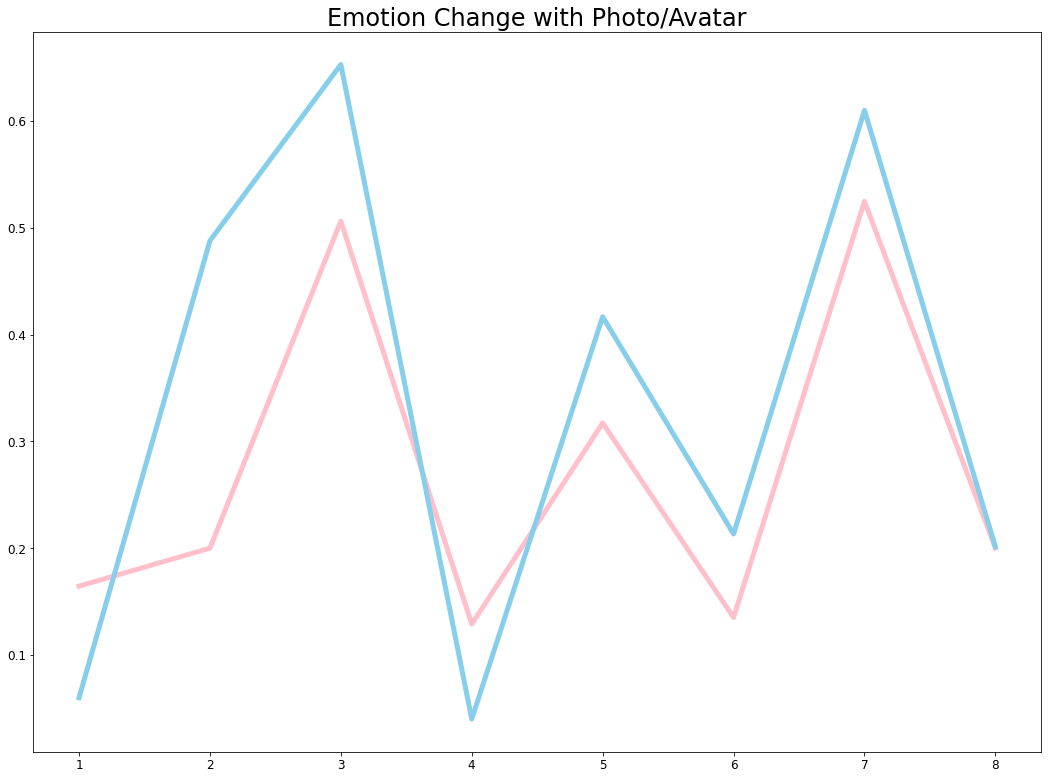

In [146]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Emotion Change with Photo/Avatar", fontsize=24)
ax.tick_params(labelsize=14)

# Photo plot
pho = pd.pivot_table(photo, values = "Emotion change", index = "Week", aggfunc = "mean")
ax.plot(pho, lw = 5,color = "Pink")

# Avatar plot
ava = pd.pivot_table(df, values = "Emotion change", index = "Week", aggfunc = "mean")
ax.plot(ava, lw = 5, color = "Skyblue")


ax.tick_params(labelsize=12)
plt.show()